In [240]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


In [2]:
test = pd.read_csv('test_Kaggle.csv')

In [3]:
train = pd.read_csv('datasets/train.csv')

In [5]:
train.replace(to_replace = {'Lot Frontage': None}, value = 0.0, inplace = True)

In [6]:
test.replace(to_replace = {'Lot Frontage': None}, value = 0.0, inplace = True)

In [7]:
train.replace(to_replace = {'Alley': None}, value = 'NA', inplace = True)

In [8]:
test.replace(to_replace = {'Alley': None}, value = 'NA', inplace = True)

In [9]:
train.replace(to_replace = {'Mas Vnr Type': None}, value= 'NA', inplace = True)

In [10]:
test.replace(to_replace = {'Mas Vnr Type': None}, value= 'NA', inplace = True)

In [11]:
train.replace(to_replace = {'Mas Vnr Area': None}, value = 0.0, inplace= True)

In [12]:
test.replace(to_replace = {'Mas Vnr Area': None}, value = 0.0, inplace= True)

In [13]:
train.replace(to_replace = {'Total Bsmt SF': None}, value = 0.0, inplace = True)

In [14]:
test.replace(to_replace = {'Total Bsmt SF': None}, value = 0.0, inplace = True)

In [15]:
train.replace(to_replace = {'BsmtFin SF 1': None}, value = 0.0, inplace = True)

In [16]:
test.replace(to_replace = {'BsmtFin SF 1': None}, value = 0.0, inplace = True)

In [17]:
train.replace(to_replace = {'BsmtFin SF 2': None}, value = 0.0, inplace = True)

In [18]:
test.replace(to_replace = {'BsmtFin SF 2': None}, value = 0.0, inplace = True)

In [19]:
train.replace(to_replace = {'Bsmt Unf SF': None}, value = 0.0, inplace = True)

In [20]:
test.replace(to_replace = {'Bsmt Unf SF': None}, value = 0.0, inplace = True)

In [21]:
train.replace(to_replace = {'Bsmt Qual': None}, value = 'NA', inplace = True)

In [22]:
test.replace(to_replace = {'Bsmt Qual': None}, value = 'NA', inplace = True)

In [23]:
train.replace(to_replace = {'Bsmt Cond': None}, value = 'NA', inplace = True)

In [24]:
test.replace(to_replace = {'Bsmt Cond': None}, value = 'NA', inplace = True)

In [25]:
train.loc[1456, 'Bsmt Exposure'] = 'No'
#no entry but basement was present

In [26]:
train.loc[1547, 'Bsmt Exposure'] = 'No'
#no entry but basement was present

In [27]:
train.loc[1997, 'Bsmt Exposure'] = 'No'
#no entry but basement was present

In [28]:
train.replace(to_replace = {'Bsmt Exposure': None}, value = 'NA', inplace = True)

In [29]:
test.replace(to_replace = {'Bsmt Exposure': None}, value = 'NA', inplace = True)

In [30]:
train.replace(to_replace = {'BsmtFin Type 1': None}, value = 'NA', inplace = True)

In [31]:
test.replace(to_replace = {'BsmtFin Type 1': None}, value = 'NA', inplace = True)

In [32]:
train.loc[1147, 'BsmtFin Type 2'] = 'Unf'
#no entry but basement was partially unfinished

In [33]:
train.replace(to_replace = {'BsmtFin Type 2': None}, value = 'NA', inplace = True)

In [34]:
test.replace(to_replace = {'BsmtFin Type 2': None}, value = 'NA', inplace = True)

In [35]:
train.loc[616, 'Bsmt Full Bath'] = 0.0
#no entry and has no basement

In [36]:
train.loc[616, 'Bsmt Half Bath'] = 0.0
#no entry and has no basement

In [37]:
train.loc[1327, 'Bsmt Full Bath'] = 0.0
#no entry and has no basement

In [38]:
train.loc[1327, 'Bsmt Half Bath'] = 0.0
#no entry and has no basement

In [39]:
train.replace(to_replace = {'Fireplace Qu': None}, value = 'NA', inplace = True)

In [40]:
test.replace(to_replace = {'Fireplace Qu': None}, value = 'NA', inplace = True)

In [41]:
train.loc[1712, 'Garage Yr Blt'] = 1999
#all the other homes that have garages built were close to their last remove/add date
#plus the price of the home being sold in comparison to others with and without garages 
#makes me lean towards the garage was built but maybe wasnt finished

In [42]:
train.loc[1712, 'Garage Finish'] = 'Unf'
#since we dont have data on the size of the garage or whether or not it was finished
#I chose to leave it unfinished

In [43]:
train.loc[1712, 'Garage Cars']= 1.0
#with the garage being unfinshed we can only assume it has a maximum capacity of 1

In [44]:
train.loc[1712, 'Garage Area']= 392
#took the avaerage of the garage area from homes in the area with simliar specs
#and sale price and placed that into the garage area column

In [45]:
train.loc[1712, 'Garage Qual']= 'TA'
#since we dont have eyes on the garage and in comparison to other homes in the area we are going
#to keep the garage condition typical/average to stay in the same ballpark as the others

In [46]:
train.loc[1712, 'Garage Cond']= 'TA'
#once again sticking with the same theme of keeping within the same framework
#as other similar homes in the area

In [47]:
train.replace(to_replace = {'Garage Type': None}, value= 'NA', inplace = True)

In [48]:
test.replace(to_replace = {'Garage Type': None}, value= 'NA', inplace = True)

In [49]:
train.replace(to_replace = {'Garage Yr Blt': None}, value = 0.0, inplace = True)

In [50]:
test.replace(to_replace = {'Garage Yr Blt': None}, value = 0.0, inplace = True)

In [51]:
train.replace(to_replace = {'Garage Finish': None}, value = 'NA', inplace = True)

In [52]:
test.replace(to_replace = {'Garage Finish': None}, value = 'NA', inplace = True)

In [53]:
train.replace(to_replace = {'Garage Qual': None}, value = 'NA', inplace = True)

In [54]:
test.replace(to_replace = {'Garage Qual': None}, value = 'NA', inplace = True)

In [55]:
train.replace(to_replace = {'Garage Cond': None}, value = 'NA', inplace = True)

In [56]:
test.replace(to_replace = {'Garage Cond': None}, value = 'NA', inplace = True)

In [57]:
train.replace(to_replace = {'Pool QC': None}, value = 'NA', inplace = True)

In [58]:
test.replace(to_replace = {'Pool QC': None}, value = 'NA', inplace = True)

In [59]:
train.replace(to_replace = {'Fence': None}, value = 'NA', inplace = True)

In [60]:
test.replace(to_replace = {'Fence': None}, value = 'NA', inplace = True)

In [61]:
train.replace(to_replace = {'Misc Feature': None}, value = 'NA', inplace = True)

In [62]:
test.replace(to_replace = {'Misc Feature': None}, value = 'NA', inplace = True)

In [63]:
train['Overall Cond'] = (train['Overall Qual'] + train['Overall Cond'])/2

In [64]:
test['Overall Cond'] = (test['Overall Qual'] + test['Overall Cond'])/2

In [65]:
train.drop('Overall Qual', axis = 1, inplace = True)
#added overall condition and quality and divided by 2 to get the average of the combined
# columns to get a overal quality of the home with both home and material and finished combined
# dropping the Overall Qual column was need to keep out useless and redundent information

In [66]:
test.drop('Overall Qual', axis = 1, inplace = True)
#added overall condition and quality and divided by 2 to get the average of the combined
# columns to get a overal quality of the home with both home and material and finished combined
# dropping the Overall Qual column was need to keep out useless and redundent information

In [67]:
train['Roof Style'] = train['Roof Style']+' / '+train['Roof Matl']

In [68]:
test['Roof Style'] = test['Roof Style']+' / '+test['Roof Matl']

In [69]:
train.drop('Roof Matl', axis = 1, inplace = True)
#combined roof style and roof matl into one column

In [70]:
test.drop('Roof Matl', axis = 1, inplace = True)
#combined roof style and roof matl into one column

In [71]:
train.rename(columns = {'Roof Style': 'Roof'}, inplace = True)
#renamed column to make it more indicative of what is in the column

In [72]:
test.rename(columns = {'Roof Style': 'Roof'}, inplace = True)
#renamed column to make it more indicative of what is in the column

In [73]:
train['Exterior 1st'] = train['Exterior 1st']+ ' / '+train['Exterior 2nd']

In [74]:
test['Exterior 1st'] = test['Exterior 1st']+ ' / '+test['Exterior 2nd']

In [75]:
train.drop('Exterior 2nd', axis = 1, inplace = True)
#added exterior 1st and exterior 2nd together so no need for the exterior 2nd

In [76]:
test.drop('Exterior 2nd', axis = 1, inplace = True)
#added exterior 1st and exterior 2nd together so no need for the exterior 2nd

In [77]:
train.rename(columns = {'Exterior 1st': 'Exterior'}, inplace = True)
#renamed the column to make it more indicative of what is in the column

In [78]:
test.rename(columns = {'Exterior 1st': 'Exterior'}, inplace = True)
#renamed the column to make it more indicative of what is in the column

In [79]:
train.drop('Exter Qual', axis = 1, inplace = True)
#the exter cond is the more current version of the material condition

In [80]:
test.drop('Exter Qual', axis = 1, inplace = True)
#the exter cond is the more current version of the material condition

In [81]:
train['Bsmt Full Bath'] = train['Bsmt Full Bath'] + (train['Bsmt Half Bath']/2)
#added the two columns together to get rid of the extra columns
#also divided the half bath by two because the value is represented by whole number but
#represent half value

In [82]:
test['Bsmt Full Bath'] = test['Bsmt Full Bath'] + (test['Bsmt Half Bath']/2)
#added the two columns together to get rid of the extra columns
#also divided the half bath by two because the value is represented by whole number but
#represent half value

In [83]:
train.rename(columns = {'Bsmt Full Bath': 'Bsmt Bath'}, inplace = True)
#renamed the column to represent the true value

In [84]:
test.rename(columns = {'Bsmt Full Bath': 'Bsmt Bath'}, inplace = True)
#renamed the column to represent the true value

In [85]:
train.drop('Bsmt Half Bath', axis = 1 , inplace = True)
#dropped to remove excesses columns

In [86]:
test.drop('Bsmt Half Bath', axis = 1 , inplace = True)
#dropped to remove excesses columns

In [87]:
train.drop('Garage Qual', axis = 1, inplace = True)
#dropped because garage cond is a more up to date version of the garage condition

In [88]:
test.drop('Garage Qual', axis = 1, inplace = True)
#dropped because garage cond is a more up to date version of the garage condition

In [89]:
#train[['Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch']]

In [90]:
train['Full Bath'] = train['Full Bath'] + (train['Half Bath']/2)
#combined the columns to create a streamlined data frame
#divided half bath by 2 because the values are in as whole numbers

In [91]:
test['Full Bath'] = test['Full Bath'] + (test['Half Bath']/2)
#combined the columns to create a streamlined data frame
#divided half bath by 2 because the values are in as whole numbers

In [92]:
train.rename(columns = {'Full Bath': 'Bathroom'}, inplace = True)
#changed the name to fit the column values

In [93]:
test.rename(columns = {'Full Bath': 'Bathroom'}, inplace = True)
#changed the name to fit the column values

In [94]:
train.drop('Half Bath', axis = 1, inplace = True)
#dropped because the value got absorbed into a new column

In [95]:
test.drop('Half Bath', axis = 1, inplace = True)
#dropped because the value got absorbed into a new column

In [96]:
train['Condition 1'] = train['Condition 1'] + ' / ' + train['Condition 2']
#combined to streamline data frame

In [97]:
test['Condition 1'] = test['Condition 1'] + ' / ' + test['Condition 2']
#combined to streamline data frame

In [98]:
train.rename(columns = {'Condition 1': 'Proximity'}, inplace = True)
#changed the name to fit column values

In [99]:
test.rename(columns = {'Condition 1': 'Proximity'}, inplace = True)
#changed the name to fit column values

In [100]:
train.drop('Condition 2', axis = 1, inplace = True)
#dropped because values got absorbed into a new column

In [101]:
test.drop('Condition 2', axis = 1, inplace = True)
#dropped because values got absorbed into a new column

In [102]:
train['Home Age'] = train['Yr Sold'] - train['Year Built']

In [103]:
test['Home Age'] = test['Yr Sold'] - test['Year Built']

In [213]:
y_train = train['SalePrice']
X_train = train[['1st Flr SF', 'Garage Cars', 'Gr Liv Area', 'Lot Area', 'Home Age', 'Mas Vnr Area', 'Total Bsmt SF', 'Bathroom', 'Bsmt Bath', 'Bedroom AbvGr', 'Fireplaces', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']]

In [220]:
X_test = test[['1st Flr SF', 'Garage Cars', 'Gr Liv Area', 'Lot Area', 'Home Age', 'Mas Vnr Area', 'Total Bsmt SF', 'Bathroom', 'Bsmt Bath', 'Bedroom AbvGr', 'Fireplaces', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']]

In [215]:
model_lr = LinearRegression()

In [216]:
model_lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [217]:
model_lr.score(X_train, y_train)

0.7771528297479801

In [218]:
cross_val_score(model_lr, X_train, y_train, cv = 5).mean()

0.7422181904438556

In [222]:
test['SalePrice'] = model_lr.predict(X_test)

In [223]:
submission = test[['Id', 'SalePrice']]

In [224]:
submission.to_csv('submission.csv', index = False)
# making the final rediction to Kaggle

In [193]:
poly = PolynomialFeatures(interaction_only = True)

In [194]:
X_poly = poly.fit_transform(X_train)

In [195]:
pd.DataFrame(X_poly, columns = poly.get_feature_names(['1st Flr SF', 'Garage Cars', 'Gr Liv Area', 'Lot Area', 'Home Age', 'Mas Vnr Area', 'Total Bsmt SF', 'Bathroom', 'Bsmt Bath', 'Bedroom AbvGr', 'Fireplaces', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val']))

,1,1st Flr SF,Garage Cars,Gr Liv Area,Lot Area,Home Age,Mas Vnr Area,Total Bsmt SF,Bathroom,Bsmt Bath,Bedroom AbvGr,Fireplaces,...,Open Porch SF Pool Area,Open Porch SF Misc Val,Enclosed Porch 3Ssn Porch,Enclosed Porch Screen Porch,Enclosed Porch Pool Area,Enclosed Porch Misc Val,3Ssn Porch Screen Porch,3Ssn Porch Pool Area,3Ssn Porch Misc Val,Screen Porch Pool Area,Screen Porch Misc Val,Pool Area Misc Val
0,1.0,725.0,2.0,1479.0,13517.0,34.0,289.0,725.0,2.5,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,913.0,2.0,2122.0,11492.0,13.0,132.0,913.0,2.5,1.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1057.0,1.0,1057.0,7922.0,57.0,0.0,1057.0,1.0,1.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,744.0,2.0,1444.0,9802.0,4.0,0.0,384.0,2.5,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,831.0,2.0,1445.0,14235.0,110.0,0.0,676.0,2.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,1.0,1728.0,2.0,1728.0,11449.0,1.0,0.0,1884.0,2.0,1.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2047,1.0,861.0,2.0,861.0,12342.0,69.0,0.0,861.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2048,1.0,1172.0,2.0,1913.0,7558.0,81.0,0.0,896.0,1.5,0.0,3.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2049,1.0,1200.0,1.0,1200.0,10400.0,53.0,0.0,1200.0,1.0,1.0,3.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [196]:
model_ss = StandardScaler()

In [197]:
model_ss.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [198]:
model_ss.mean_

array([1.16448805e+03, 1.77620673e+00, 1.49933008e+03, 1.00652082e+04,
       3.60667967e+01, 9.86265236e+01, 1.05747196e+03, 1.76279863e+00,
       4.58800585e-01, 2.84349098e+00, 5.90931253e-01, 4.73631887e+02,
       9.38337396e+01, 4.75568016e+01, 2.25719161e+01, 2.59141882e+00,
       1.65114578e+01, 2.39785471e+00, 5.15743540e+01])

In [199]:
model_ss.scale_

array([3.96350264e+02, 7.64356783e-01, 5.00325814e+02, 6.74084500e+03,
       3.02036953e+01, 1.74282187e+02, 4.49798310e+02, 6.37619421e-01,
       5.19145234e-01, 8.26416785e-01, 6.38360636e-01, 2.15836783e+02,
       1.28518074e+02, 6.67309674e+01, 5.98305186e+01, 2.52234636e+01,
       5.73602152e+01, 3.77733583e+01, 5.73254184e+02])

In [200]:
model_ss.transform(X_train)

array([[-1.10883755,  0.2927864 , -0.04063369, ..., -0.28785558,
        -0.06348005, -0.08996769],
       [-0.63450962,  0.2927864 ,  1.24452887, ..., -0.28785558,
        -0.06348005, -0.08996769],
       [-0.27119461, -1.01550316, -0.88408407, ..., -0.28785558,
        -0.06348005, -0.08996769],
       ...,
       [ 0.0189528 ,  0.2927864 ,  0.82680107, ..., -0.28785558,
        -0.06348005, -0.08996769],
       [ 0.08959738, -1.01550316, -0.59827032, ..., -0.28785558,
        -0.06348005, -0.08996769],
       [-0.34436221,  0.2927864 ,  0.60894303, ..., -0.28785558,
        -0.06348005, -0.08996769]])

In [201]:
model_OLS = sm.OLS(y_train, X_train).fit()

In [206]:
train['Year Built'].dtypes

dtype('int64')

In [202]:
model_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              SalePrice   R-squared (uncentered):                   0.963
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              2791.
Date:                Thu, 16 Jan 2020   Prob (F-statistic):                        0.00
Time:                        15:44:05   Log-Likelihood:                         -24541.
No. Observations:                2051   AIC:                                  4.912e+04
Df Residuals:                    2032   BIC:                                  4.923e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
1st Flr SF         9.2427      3.984      2.320      0.020       1.431      17.055
Garage Cars     1.171e+04   2613.962      4.480      0.000    6585.121    1.68e+04
Gr Liv Area       59.2306      3.496     16.940      0.000      52.374      66.088
Lot Area           0.3291      0.141      2.337      0.020       0.053       0.605
Home Age        -387.0226     33.860    -11.430      0.000    -453.426    -320.619
Mas Vnr Area      42.2232      5.623      7.509      0.000      31.196      53.250
Total Bsmt SF     32.3221      3.397      9.515      0.000      25.660      38.984
Bathroom        1.114e+04   2119.596      5.258      0.000    6987.932    1.53e+04
Bsmt Bath       1.227e+04   1770.498      6.929      0.000    8795.998    1.57e+04
Bedroom AbvGr  -6365.4637   1219.504     -5.220      0.000   -8757.073   -3973.855
Fireplaces      7760.8250   1589.579      4.882      0.000    4643.451    1.09e+04
Garage Area       30.4908      9.299      3.279      0.001      12.254      48.728
Wood Deck SF      36.4869      7.238      5.041      0.000      22.292      50.682
Open Porch SF     39.6036     13.928      2.844      0.005      12.290      66.918
Enclosed Porch    21.5504     15.506      1.390      0.165      -8.859      51.960
3Ssn Porch        33.5141     33.680      0.995      0.320     -32.537      99.566
Screen Porch      79.0622     15.276      5.176      0.000      49.104     109.021
Pool Area       -141.7131     22.934     -6.179      0.000    -186.691     -96.736
Misc Val         -14.2319      1.508     -9.436      0.000     -17.190     -11.274
==============================================================================
Omnibus:                      838.960   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            57586.344
Skew:                          -1.065   Prob(JB):                         0.00
Kurtosis:                      28.871   Cond. No.                     4.02e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

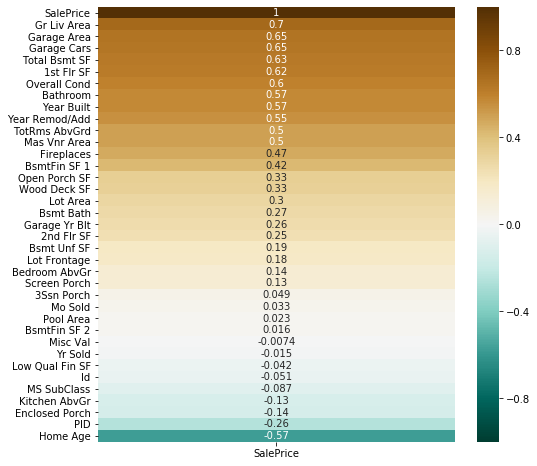

In [203]:
price_corr = train.corr()[['SalePrice']].sort_values('SalePrice', ascending = False)
plt.figure(figsize = (8, 8))
sns.heatmap(price_corr, vmin = -1, vmax = 1, annot = True, cmap = 'BrBG_r');

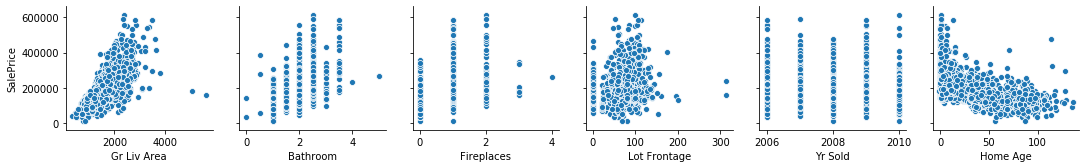

In [225]:
sns.pairplot(train, y_vars = ['SalePrice'], x_vars = ['Gr Liv Area', 'Bathroom', 'Fireplaces', 'Lot Frontage', 'Yr Sold', 'Home Age'])

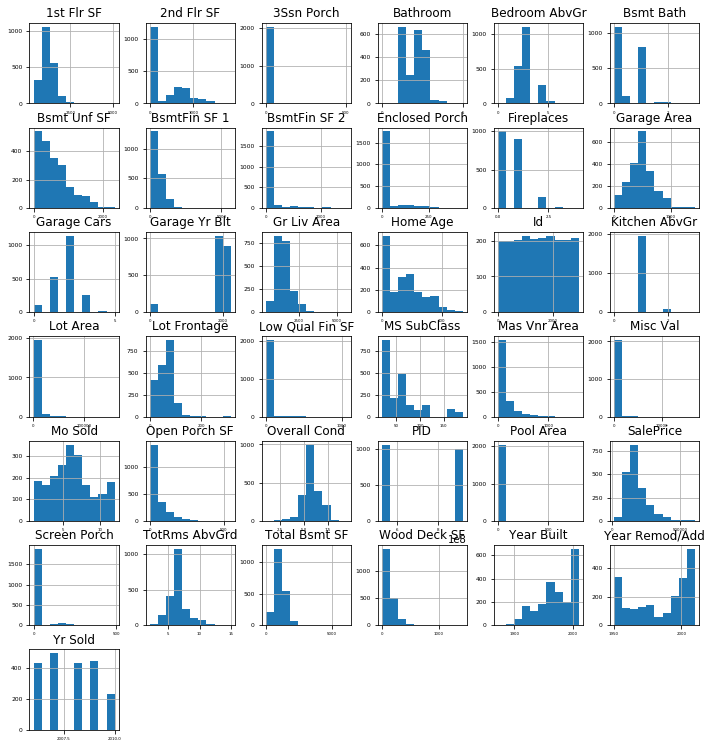

In [235]:
train.hist(ylabelsize = 6, xlabelsize = 4, figsize = (12, 13));

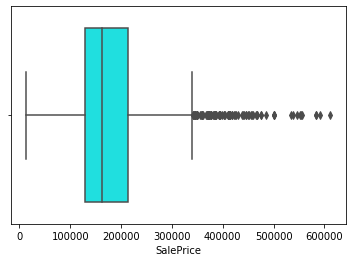

In [236]:
sns.boxplot(train['SalePrice'], color = 'cyan');

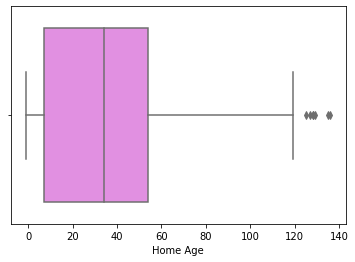

In [238]:
sns.boxplot(train['Home Age'], color = 'violet');

In [244]:
X_train_tts, X_test_tts, y_train_tts, y_test_tts = train_test_split(X_train, y_train, random_state = 42)

In [241]:
model_pipe = Pipeline([('model_ss', StandardScaler()), ('model_knn', KNeighborsClassifier())])

In [245]:
model_pipe.fit(X_train_tts, y_train_tts)

Pipeline(memory=None,
         steps=[('model_ss',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('model_knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [246]:
model_pipe.score(X_test_tts, y_test_tts)

0.007797270955165692

In [248]:
model_pipe.get_params()

{'memory': None,
 'steps': [('model_ss',
   StandardScaler(copy=True, with_mean=True, with_std=True)),
  ('model_knn',
   KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                        metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                        weights='uniform'))],
 'verbose': False,
 'model_ss': StandardScaler(copy=True, with_mean=True, with_std=True),
 'model_knn': KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
 'model_ss__copy': True,
 'model_ss__with_mean': True,
 'model_ss__with_std': True,
 'model_knn__algorithm': 'auto',
 'model_knn__leaf_size': 30,
 'model_knn__metric': 'minkowski',
 'model_knn__metric_params': None,
 'model_knn__n_jobs': None,
 'model_knn__n_neighbors': 5,
 'model_knn__p': 2,
 'model_knn__weights': 'uniform'}

In [271]:
train_neighborhood = train[['Neighborhood','SalePrice', 'Lot Area', 'Gr Liv Area']]
    

In [272]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'NAmes')&
                   (train_neighborhood['Lot Area'] >= 16_000)].mean()

SalePrice      189041.666667
Lot Area        21667.166667
Gr Liv Area      1707.416667
dtype: float64

In [333]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'NAmes')&
                   (train_neighborhood['Lot Area'] >= 16_000)]

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
5,NAmes,190000,16492,1888
108,NAmes,252000,39384,1390
236,NAmes,200000,22002,1652
353,NAmes,97500,17503,1458
675,NAmes,207500,16321,1600
781,NAmes,128000,17199,914
965,NAmes,172500,17360,1556
1080,NAmes,215000,31770,1656
1335,NAmes,242000,27650,2069
1336,NAmes,157500,17600,1478


In [273]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'NAmes')&
                   (train_neighborhood['Lot Area'] < 8_000)].mean()

SalePrice      127573.220339
Lot Area         7299.932203
Gr Liv Area      1079.593220
dtype: float64

In [335]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'NAmes')&
                   (train_neighborhood['Lot Area'] < 8_000)].head()

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
2,NAmes,109000,7922,1057
58,NAmes,136000,7942,1040
97,NAmes,124000,7450,1074
154,NAmes,120000,7535,912
164,NAmes,129900,7100,816


In [285]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Blmngtn')&
                   (train_neighborhood['Lot Area'] <8_000)].mean()

SalePrice      200417.681818
Lot Area         3396.818182
Gr Liv Area      1433.454545
dtype: float64

In [336]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Blmngtn')&
                   (train_neighborhood['Lot Area'] <8_000)].head()

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
69,Blmngtn,213490,3013,1506
208,Blmngtn,234000,3196,1557
215,Blmngtn,192000,3182,1269
277,Blmngtn,192500,3182,1555
504,Blmngtn,226500,3621,1589


In [299]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Blueste')&
                   (train_neighborhood['Lot Area'] < 8_000)].mean()

SalePrice      144566.666667
Lot Area         2409.666667
Gr Liv Area      1214.000000
dtype: float64

In [329]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Blueste')&
                   (train_neighborhood['Lot Area'] < 8_000)]

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
278,Blueste,151000,1950,1556
1463,Blueste,123900,1782,1045
1510,Blueste,124000,1300,1229
1838,Blueste,121000,1612,1229
1953,Blueste,185000,3907,1034
2033,Blueste,162500,3907,1191


In [300]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'CollgCr')&
                   (train_neighborhood['Lot Area'] >= 16_000)].mean()

SalePrice      189971.428571
Lot Area        17200.142857
Gr Liv Area      1454.714286
dtype: float64

In [328]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'CollgCr')&
                   (train_neighborhood['Lot Area'] >= 16_000)]

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
749,CollgCr,130000,16300,907
1006,CollgCr,267000,16226,2452
1150,CollgCr,187100,16285,1430
1616,CollgCr,140000,16269,907
1753,CollgCr,147900,16561,1097
1792,CollgCr,246900,17227,1341
1960,CollgCr,210900,21533,2049


In [302]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'OldTown')&
                   (train_neighborhood['Lot Area'] >= 16_000)].mean()

SalePrice      292500.00
Lot Area        24148.00
Gr Liv Area      3056.75
dtype: float64

In [327]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'OldTown')&
                   (train_neighborhood['Lot Area'] >= 16_000)]

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
1035,OldTown,475000,22950,3608
1701,OldTown,220000,33120,2486
1939,OldTown,295000,18386,3493
1965,OldTown,180000,22136,2640


In [303]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'OldTown')&
                   (train_neighborhood['Lot Area'] < 8_000)].mean()

SalePrice      109320.6000
Lot Area         5789.8375
Gr Liv Area      1214.5375
dtype: float64

In [334]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'OldTown')&
                   (train_neighborhood['Lot Area'] < 8_000)].head()

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
16,OldTown,98000,4571,1344
63,OldTown,122250,7308,1740
80,OldTown,114000,4571,1232
110,OldTown,150000,6406,1558
124,OldTown,110000,3500,1284


In [304]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Edwards')&
                   (train_neighborhood['Lot Area'] >= 16_000)].mean()

SalePrice      198990.000000
Lot Area        24587.333333
Gr Liv Area      2337.666667
dtype: float64

In [325]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Edwards')&
                   (train_neighborhood['Lot Area'] >= 16_000)]

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
70,Edwards,308030,17485,1508
116,Edwards,149900,17755,1466
521,Edwards,109900,17808,1242
572,Edwards,130000,22692,1630
616,Edwards,284700,47007,3820
960,Edwards,160000,63887,5642
972,Edwards,122000,16287,1351
1249,Edwards,274970,19690,2201
1277,Edwards,135000,17140,1229
1360,Edwards,235000,19950,2009


In [305]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Edwards')&
                   (train_neighborhood['Lot Area'] < 8_000)].mean()

SalePrice      126800.000
Lot Area         6151.200
Gr Liv Area      1260.725
dtype: float64

In [337]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Edwards')&
                   (train_neighborhood['Lot Area'] < 8_000)].head()

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
6,Edwards,140000,3675,1072
67,Edwards,130000,3363,1708
73,Edwards,137500,2522,1709
134,Edwards,98000,5604,864
146,Edwards,198500,7301,1922


In [307]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Somerst')&
                   (train_neighborhood['Lot Area'] < 8_000)].mean()

SalePrice      194315.135593
Lot Area         4292.372881
Gr Liv Area      1419.898305
dtype: float64

In [338]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Somerst')&
                   (train_neighborhood['Lot Area'] < 8_000)].head()

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
13,Somerst,200000,2645,1607
50,Somerst,166000,2998,1524
56,Somerst,149500,2544,1200
89,Somerst,155000,3215,1200
95,Somerst,166000,3523,1151


In [308]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'NridgHt')&
                   (train_neighborhood['Lot Area'] >= 16_000)].mean()

SalePrice      352965.9
Lot Area        16623.5
Gr Liv Area      2229.0
dtype: float64

In [321]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'NridgHt')&
                   (train_neighborhood['Lot Area'] >= 16_000)]

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
270,NridgHt,370000,16451,2690
489,NridgHt,421250,16900,2649
620,NridgHt,296000,16870,1782
726,NridgHt,412083,16387,2589
800,NridgHt,500067,17169,2290
903,NridgHt,326000,16033,1850
1296,NridgHt,286500,16770,1712
1630,NridgHt,342643,16259,2596
1719,NridgHt,260116,16659,2152
1929,NridgHt,315000,16737,1980


In [309]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'NridgHt')&
                   (train_neighborhood['Lot Area'] < 8_000)].mean()

SalePrice      222822.500000
Lot Area         5612.541667
Gr Liv Area      1467.916667
dtype: float64

In [339]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'NridgHt')&
                   (train_neighborhood['Lot Area'] < 8_000)].head()

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
49,NridgHt,155000,2448,1626
85,NridgHt,310090,6373,1666
98,NridgHt,277500,7313,1561
109,NridgHt,175500,2628,1626
137,NridgHt,209500,4590,1554


In [319]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Gilbert')&
                   (train_neighborhood['Lot Area'] >= 16_000)].mean()

SalePrice      179427.111111
Lot Area        26944.666667
Gr Liv Area      1447.777778
dtype: float64

In [318]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Gilbert')&
                   (train_neighborhood['Lot Area'] >= 16_000)]

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
24,Gilbert,145000,34650,1056
140,Gilbert,141000,19138,864
441,Gilbert,155000,41600,1424
556,Gilbert,199500,18494,1324
886,Gilbert,175000,21872,1446
1155,Gilbert,192140,21930,1838
1167,Gilbert,133000,47280,1488
1224,Gilbert,154204,18160,1128
1739,Gilbert,320000,19378,2462


In [311]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Gilbert')&
                   (train_neighborhood['Lot Area'] < 8_000)].mean()

SalePrice      183661.619048
Lot Area         7753.809524
Gr Liv Area      1567.476190
dtype: float64

In [312]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Sawyer')&
                   (train_neighborhood['Lot Area'] >= 16_000)].mean()

SalePrice      146500.000000
Lot Area        19615.833333
Gr Liv Area      1671.333333
dtype: float64

In [340]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Sawyer')&
                   (train_neighborhood['Lot Area'] >= 16_000)]

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
76,Sawyer,105000,17529,872
160,Sawyer,112000,25339,1416
765,Sawyer,190000,18890,2620
1009,Sawyer,171000,16647,1701
1174,Sawyer,170000,17920,1779
1481,Sawyer,131000,21370,1640


In [313]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Sawyer')&
                   (train_neighborhood['Lot Area'] < 8_000)].mean()

SalePrice      133176.086957
Lot Area         7146.130435
Gr Liv Area      1019.434783
dtype: float64

In [342]:
train_neighborhood[(train_neighborhood['Neighborhood'] == 'Sawyer')&
                   (train_neighborhood['Lot Area'] < 8_000)].head()

,Neighborhood,SalePrice,Lot Area,Gr Liv Area
136,Sawyer,94000,6342,1020
142,Sawyer,127000,6897,1040
169,Sawyer,152000,7400,1126
329,Sawyer,145000,7476,1040
351,Sawyer,88750,4280,704


In [296]:
train_neighborhood['Neighborhood'].sort_values().value_counts()

NAmes      310
CollgCr    180
OldTown    163
Edwards    143
Somerst    130
NridgHt    122
Gilbert    116
Sawyer     111
NWAmes      87
SawyerW     87
Mitchel     82
BrkSide     76
Crawfor     71
IDOTRR      69
NoRidge     48
Timber      48
StoneBr     38
SWISU       32
ClearCr     27
MeadowV     24
Blmngtn     22
BrDale      19
Veenker     17
NPkVill     17
Blueste      6
Greens       3
GrnHill      2
Landmrk      1
Name: Neighborhood, dtype: int64

In [297]:
train_neighborhood.sort_values('Neighborhood')

SalePrice      181469.701609
Lot Area        10065.208191
Gr Liv Area      1499.330083
dtype: float64

In [ ]:
# https://www.byoh.com/costtobuildiniowa.htm
# average current cost of building a 2650 sqft home with 2 fireplaces

In [ ]:
# https://www.reddit.com/r/Infographics/comments/9ln0y6/the_average_yard_size_of_each_state/
# visual of shrinking yards

In [ ]:
# https://www.google.com/travel/things-to-do/see-all?g2lb=2502405%2C2502548%2C4208993%2C4254308%2C4258168%2C4260007%2C4270442%2C4274032%2C4291318%2C4305595%2C4308216%2C4314846%2C4315873%2C4317915%2C4324293%2C4328159%2C4329288%2C4330113%2C4340162%2C4270859%2C4284970%2C4291517%2C4292955%2C4316256&hl=en&gl=us&un=1&otf=1&dest_mid=%2Fm%2F0nmj&dest_state_type=sattd&dest_src=ts&sa=X
# things to do in Ames

In [ ]:
# https://www.multifamily.loans/apartment-finance-blog/multifamily-construction-costs-an-investor-guide
# cost of building multi family homes

In [ ]:
# https://www.bestplaces.net/economy/city/iowa/ames
# stats on Ames

In [ ]:
# https://livingwage.mit.edu/states/19
# typical salaries

In [ ]:
# https://forums.jlconline.com/forums/forum/jlc-online-expert-forums/estimating-markup/18675-new-construction-markup-vs-remodeling-markup
# mark up on construction

In [ ]:
# https://en.wikipedia.org/wiki/Ames,_Iowa#Campustown
# wiki info